In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

filepath = './CleanData/NYC_MLdata.csv'
data = pd.read_csv(filepath)


In [190]:
'''
This is the Preprocessing part.
1) Label Encoding
2) One hot encoding
3) Splitting data into Train/test set 70/30
4) y = feature column, which is SALE PRICE
5) X = everything else, without the log transformation columns
'''

'\nThis is the Preprocessing part.\n1) Label Encoding\n2) One hot encoding\n3) Splitting data into Train/test set 70/30\n4) y = feature column, which is SALE PRICE\n5) X = everything else, without the log transformation columns\n'

In [191]:
#Rename column
data.rename(columns={'New Building Class Category': 'BUILDING CLASS'}, inplace=True)

#Use Label Encoder to transform categories into numbers
print(data['BUILDING CLASS'].unique())
label_encoder = LabelEncoder()
data['BUILDING CLASS'] = label_encoder.fit_transform(data['BUILDING CLASS'])
print(data['BUILDING CLASS'].unique())

print(data.info())

['A' 'B' 'C' 'D' 'R']
[0 1 2 3 4]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54383 entries, 0 to 54382
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BOROUGH                    54383 non-null  int64  
 1   ZIP CODE                   54383 non-null  float64
 2   RESIDENTIAL UNITS          54383 non-null  float64
 3   COMMERCIAL UNITS           54383 non-null  float64
 4   TOTAL UNITS                54383 non-null  float64
 5   LAND SQUARE FEET           54383 non-null  float64
 6   GROSS SQUARE FEET          54383 non-null  float64
 7   TAX CLASS AT TIME OF SALE  54383 non-null  int64  
 8   SALE PRICE                 54383 non-null  int64  
 9   SALE PRICE_log             54383 non-null  float64
 10  LAND SQUARE FEET_log       54383 non-null  float64
 11  GROSS SQUARE FEET_log      54383 non-null  float64
 12  BUILDING CLASS             54383 non-null  int32  
 13  BUILDING AGE

In [192]:
# Select the categorical columns
categorical_columns = ['BOROUGH', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS']

# Create a new DataFrame with the selected columns
data_categorical = data[categorical_columns]

# Perform one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
encoded_features = onehot_encoder.fit_transform(data_categorical)

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original data
data_encoded = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)

# Print the updated DataFrame information
print(data_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54383 entries, 0 to 54382
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ZIP CODE                     54383 non-null  float64
 1   RESIDENTIAL UNITS            54383 non-null  float64
 2   COMMERCIAL UNITS             54383 non-null  float64
 3   TOTAL UNITS                  54383 non-null  float64
 4   LAND SQUARE FEET             54383 non-null  float64
 5   GROSS SQUARE FEET            54383 non-null  float64
 6   SALE PRICE                   54383 non-null  int64  
 7   SALE PRICE_log               54383 non-null  float64
 8   LAND SQUARE FEET_log         54383 non-null  float64
 9   GROSS SQUARE FEET_log        54383 non-null  float64
 10  BUILDING AGE                 54383 non-null  int64  
 11  BOROUGH_1                    54383 non-null  float64
 12  BOROUGH_2                    54383 non-null  float64
 13  BOROUGH_3       

In [193]:
#Splitting data into train/test split

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error


X = data_encoded.drop(columns=['SALE PRICE', 'SALE PRICE_log', 'GROSS SQUARE FEET_log', 'LAND SQUARE FEET_log'])  # Drop the target column from the features
y = data_encoded['SALE PRICE']  # Extract the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#We will evaluate model on MAE (lower = better), RMSE (lower = better) and r-squared value (higher = better)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(y_test, y_pred, model_name):
    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate the MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    # Plotting Residuals
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Residuals')
    plt.title(f'{model_name}: Residual Plot')
    plt.show()

    # Plotting y_pred vs y_test
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title(f'{model_name}: Predictions vs. Actual')
    plt.show()

    return rmse, mae, r2








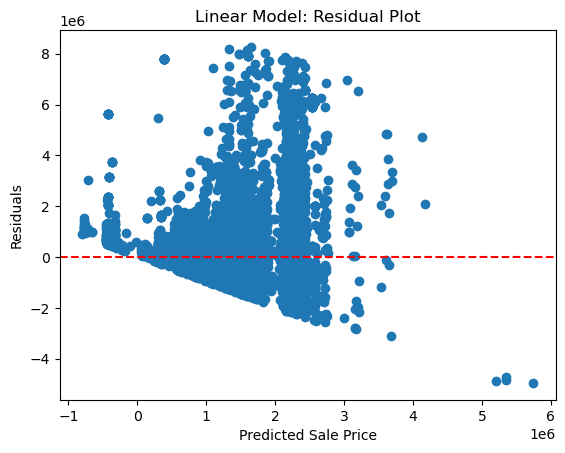

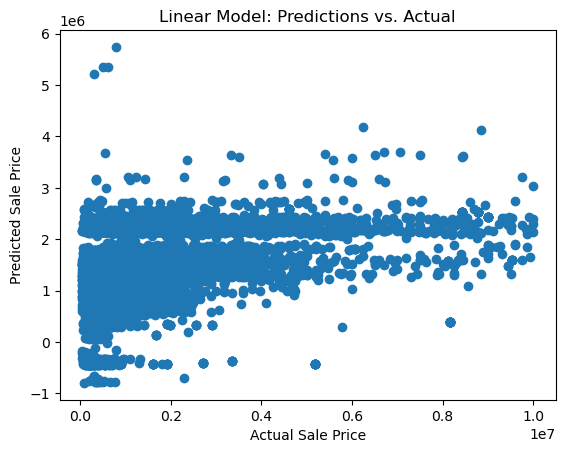

Root Mean Squared Error: 1171582.3429493506
Mean Absolute Error: 685369.3170557468
R-squared: 0.21187487694750728


In [194]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#FIRST Model: Basic Linear Regression
#Using Pipeline to build model
steps = [
    ('scaler', StandardScaler()), # Step 1: StandardScaler
    ('model', LinearRegression()) # Step 2: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='Linear Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

In [195]:
# Summary statistics for y_train
print("Summary Statistics for y_train:")
print(y_train.describe())


# Summary statistics for y_test
print("\nSummary Statistics for y_test:")
print(y_test.describe())

print("Comparing X_train and X_test")
print(X_train.describe())
print(X_test.describe())

Summary Statistics for y_train:
count    3.806800e+04
mean     1.208001e+06
std      1.319392e+06
min      5.000000e+04
25%      5.200000e+05
50%      8.000000e+05
75%      1.325000e+06
max      1.000000e+07
Name: SALE PRICE, dtype: float64

Summary Statistics for y_test:
count    1.631500e+04
mean     1.204984e+06
std      1.319740e+06
min      5.000000e+04
25%      5.178900e+05
50%      8.000000e+05
75%      1.330000e+06
max      1.000000e+07
Name: SALE PRICE, dtype: float64
Comparing X_train and X_test
           ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  \
count  38068.000000       38068.000000      38068.000000  38068.000000   
mean   10795.707497           2.675265          0.045025      3.033493   
std      583.168348          24.194551          0.252906     24.202291   
min    10001.000000           0.000000          0.000000      1.000000   
25%    10065.000000           0.000000          0.000000      1.000000   
50%    11203.000000           1.000000       

In [196]:
'''
Residual Plot: We want the residuals to be around the 0 mark. In this, we see that there is no real pattern in residuals
and for units around the $3,000,000 mark, the linear regression model produces huge residuals.

The Predict vs Actual plot the linear model predicts most sale prices to be under 5,000,000 despite sale price to be much higher.

Summary Statistics of X_train vs X_test and y_train vs y_test shows the data to be quite similar!

Conclusion: Linear Model is not great for prediction! But how bad is this model? Lets fit a DummyRegressor in the pipeline and maybe a polynomial regressor
'''

'\nResidual Plot: We want the residuals to be around the 0 mark. In this, we see that there is no real pattern in residuals\nand for units around the $3,000,000 mark, the linear regression model produces huge residuals.\n\nThe Predict vs Actual plot the linear model predicts most sale prices to be under 5,000,000 despite sale price to be much higher.\n\nSummary Statistics of X_train vs X_test and y_train vs y_test shows the data to be quite similar!\n\nConclusion: Linear Model is not great for prediction! But how bad is this model? Lets fit a DummyRegressor in the pipeline and maybe a polynomial regressor\n'

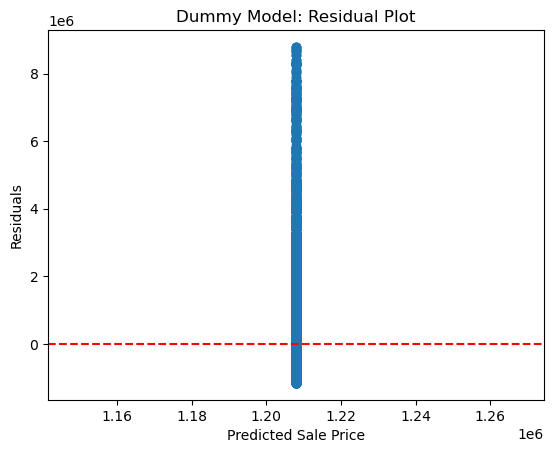

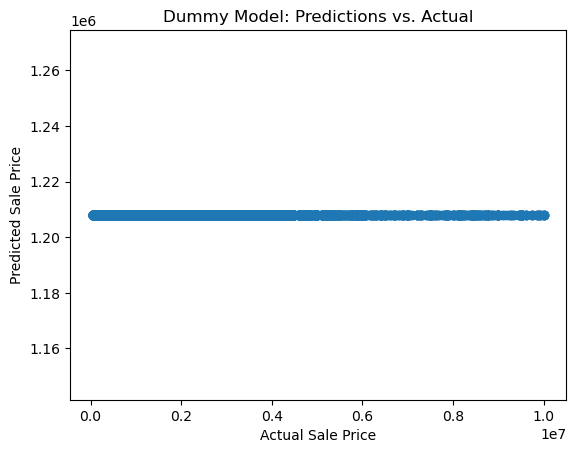

Root Mean Squared Error: 1319703.495441018
Mean Absolute Error: 808549.4356173613
R-squared: -5.227342181113315e-06


In [197]:
from sklearn.dummy import DummyRegressor

#SECOND Model: Dummy Regression
#Using Pipeline to create models
steps = [
    ('scaler', StandardScaler()), # Step 1: StandardScaler
    ('model', DummyRegressor()) # Step 2: Dummy Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='Dummy Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


In [198]:
'''
This offers a baseline for MAE and RMSE. Our final model will need to be significantly better than this!
'''

'\nThis offers a baseline for MAE and RMSE. Our final model will need to be significantly better than this!\n'

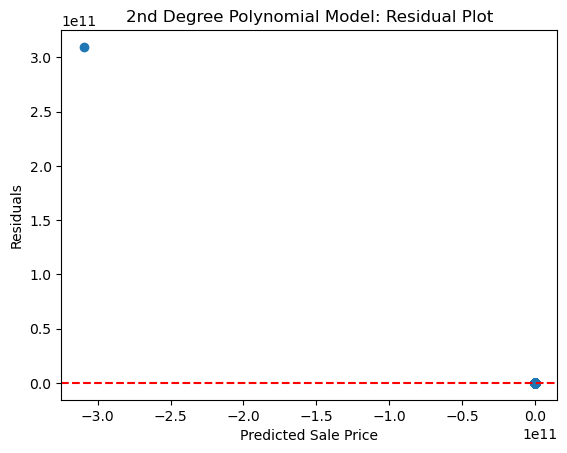

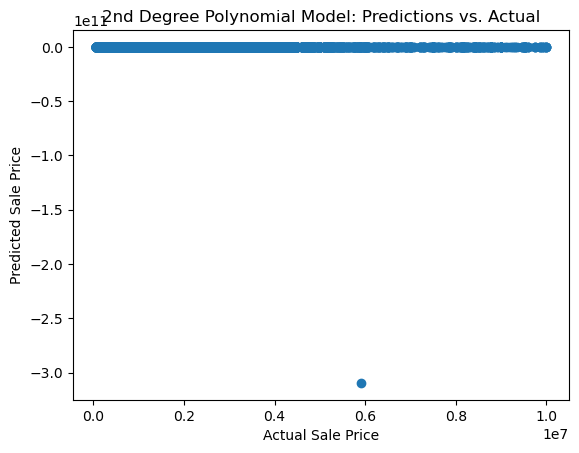

Root Mean Squared Error: 2423042666.615432
Mean Absolute Error: 19565439.282167245
R-squared: -3371099.1843768675


In [199]:
#Third Model: 2nd Degree Regression
from sklearn.preprocessing import PolynomialFeatures

#Using Pipeline to build the model
steps = [
    ('scaler', StandardScaler()),     # Step 1: StandardScaler
    ('polynomial', PolynomialFeatures(degree=2)),  # Step 2: PolynomialFeatures
    ('model', LinearRegression())    # Step 3: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='2nd Degree Polynomial Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

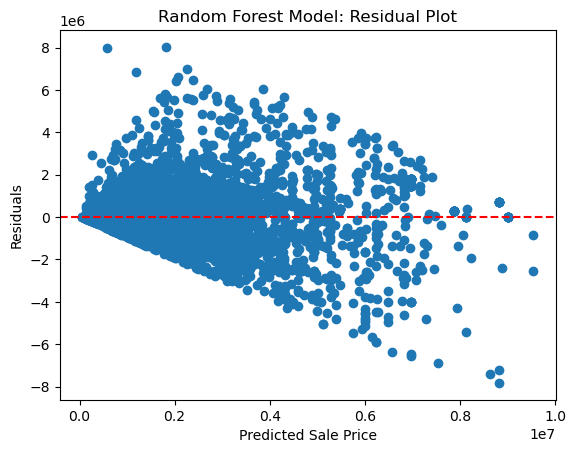

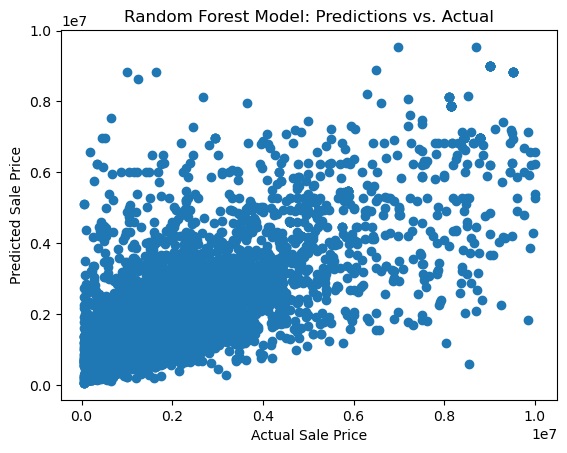

Root Mean Squared Error: 777792.8311449148
Mean Absolute Error: 393241.3039028737
R-squared: 0.6526419179423688


In [200]:
#Fourth Model: Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

#Using Pipeline to build the model
steps = [
    ('scaler', StandardScaler()),     # Step 1: StandardScaler
    ('model', RandomForestRegressor(n_estimators=100))    # Step 2: RandomForest Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='Random Forest Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

                        Feature  Importance
0                      ZIP CODE    0.269210
5             GROSS SQUARE FEET    0.173012
6                  BUILDING AGE    0.163347
4              LAND SQUARE FEET    0.153015
1             RESIDENTIAL UNITS    0.118321
9                     BOROUGH_3    0.025761
3                   TOTAL UNITS    0.020364
18             BUILDING CLASS_3    0.017127
19             BUILDING CLASS_4    0.014556
13  TAX CLASS AT TIME OF SALE_2    0.008444
2              COMMERCIAL UNITS    0.007708
7                     BOROUGH_1    0.007332
12  TAX CLASS AT TIME OF SALE_1    0.005518
15             BUILDING CLASS_0    0.005116
17             BUILDING CLASS_2    0.004367
14  TAX CLASS AT TIME OF SALE_4    0.003690
16             BUILDING CLASS_1    0.001406
10                    BOROUGH_4    0.001126
8                     BOROUGH_2    0.000453
11                    BOROUGH_5    0.000126
The feature with the highest importance is: ZIP CODE


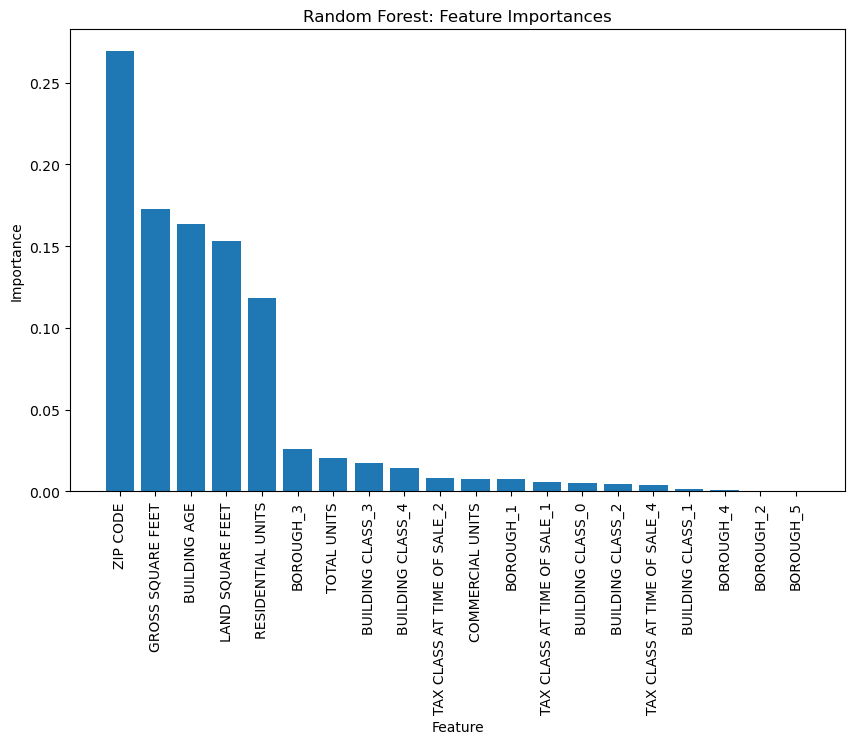

In [201]:
#The results here are much better, MAE decreased by 50% with R-squared increasing significantly
#Let's see which feature explains the variation the most.

# Access the RandomForestRegressor model from the pipeline
rf_model = pipeline.named_steps['model']

# Retrieve the feature importances
importances = rf_model.feature_importances_

# Create a dataframe to display the feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importances
print(feature_importances)

# Find the feature with the highest importance
highest_importance_feature = feature_importances['Feature'].iloc[0]
print(f"The feature with the highest importance is: {highest_importance_feature}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest: Feature Importances')
plt.xticks(rotation=90)
plt.show()

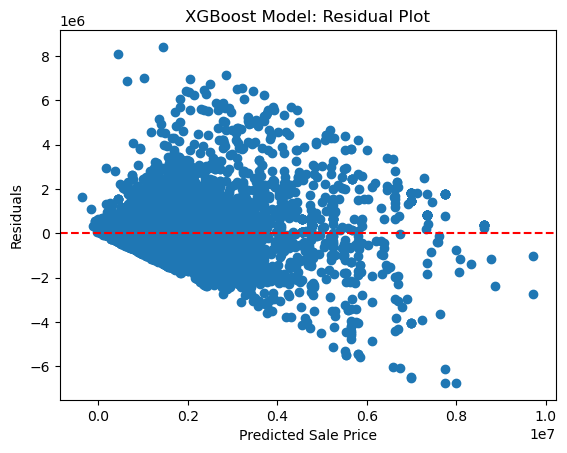

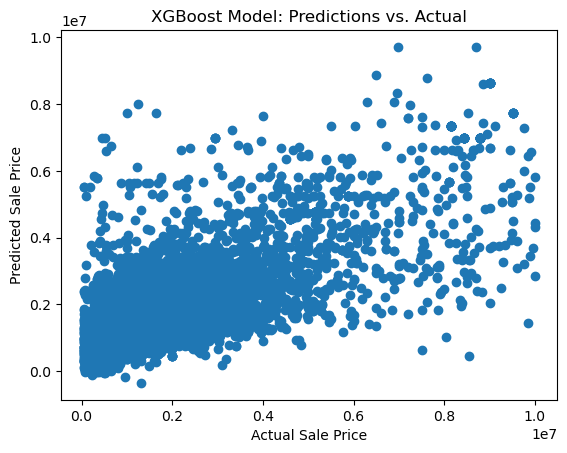

Root Mean Squared Error: 807951.6967617235
Mean Absolute Error: 430836.16822839354
R-squared: 0.6251820932854617


In [202]:
#Fifth Model: XGBOOST
import xgboost as xgb

#Using Pipeline to build the model
steps = [
    
    ('model', xgb.XGBRegressor())    # Step 1: XGBoost Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='XGBoost Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

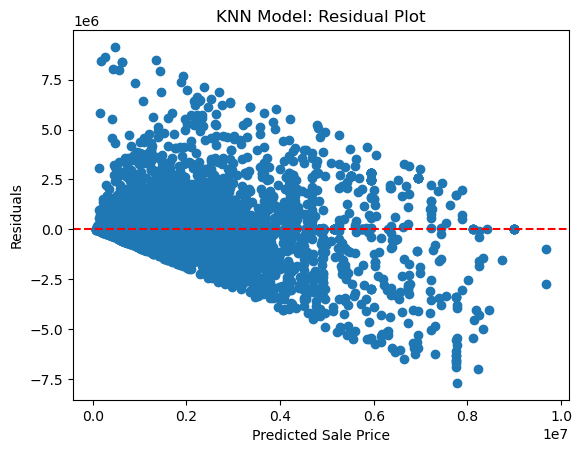

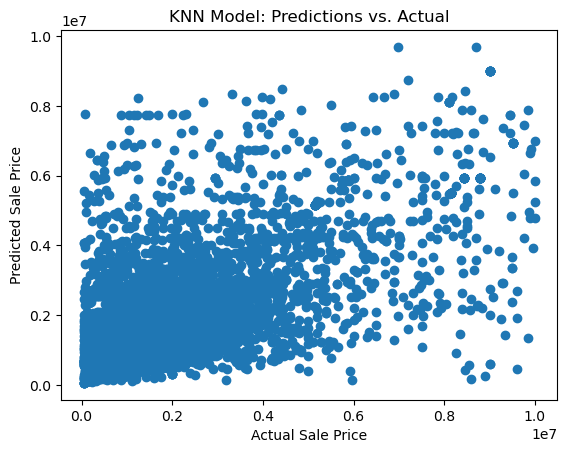

Root Mean Squared Error: 918333.8598088635
Mean Absolute Error: 457842.27240780473
R-squared: 0.5157710716391375


In [203]:
#Sixth Model: KNN Neighbours
from sklearn.neighbors import KNeighborsRegressor

#Using Pipeline to build the model
steps = [
    ('scaler', StandardScaler()),     # Step 1: StandardScaler
    ('model', KNeighborsRegressor(n_neighbors=3))    # Step 2: KNN Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='KNN Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

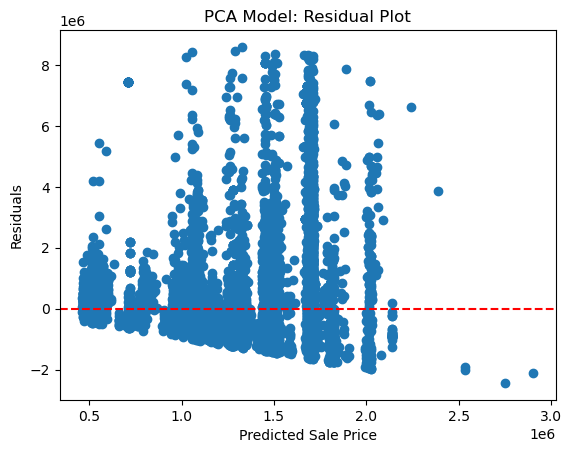

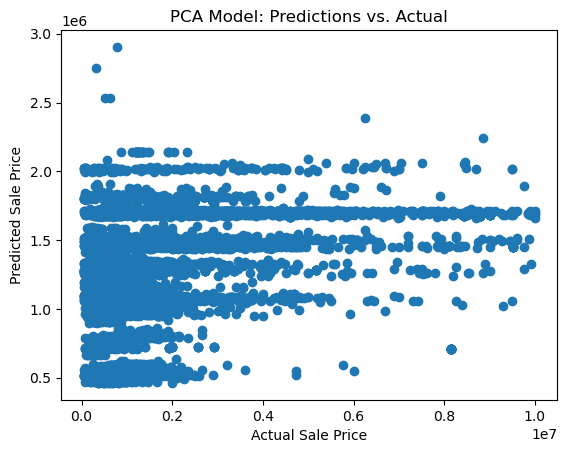

Root Mean Squared Error: 1260458.5919011927
Mean Absolute Error: 789544.1756841706
R-squared: 0.08776506045129895
Principal Component 1: Explained Variance Ratio = 0.19793014901062045, Explained Variance = 3.958706970623533
Principal Component 2: Explained Variance Ratio = 0.12955276285792108, Explained Variance = 2.5911233228125887
Principal Component 3: Explained Variance Ratio = 0.10894897977983786, Explained Variance = 2.1790368362407695
Principal Component 4: Explained Variance Ratio = 0.09709826392389141, Explained Variance = 1.942016292880815
Principal Component 5: Explained Variance Ratio = 0.0751611299550767, Explained Variance = 1.5032620879658816
Principal Component 6: Explained Variance Ratio = 0.06969100056335557, Explained Variance = 1.3938566261832142
Principal Component 7: Explained Variance Ratio = 0.06280159004985973, Explained Variance = 1.2560647962897318
Principal Component 8: Explained Variance Ratio = 0.0593313515946363, Explained Variance = 1.1866582039586073


In [204]:
#Seventh Model: PCA + LinearRegression
from sklearn.decomposition import PCA

#Using Pipeline to build model
steps = [
    ('scaler', StandardScaler()),  # Step 1: StandardScaler
    ('pca', PCA(n_components=8)),  # Step 2: PCA with 8 components
    ('model', LinearRegression())  # Step 3: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='PCA Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


pca = pipeline.named_steps['pca']
# Get the explained variance ratio for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Get the explained variance for each principal component
explained_variances = pca.explained_variance_

# Print the explained variance ratio and explained variance
for i in range(len(explained_variance_ratios)):
    print(f"Principal Component {i + 1}: Explained Variance Ratio = {explained_variance_ratios[i]}, Explained Variance = {explained_variances[i]}")

In [205]:
''' 
After comparing the MAE, RMSE and R-squared of Linear Regression, Polynomial Regression, Random Forest, XGBoost and KNNRegressor
The optimal method producing the smallest RMSE and highest R-squared is Random Forest Regressor.
'''


' \nAfter comparing the MAE, RMSE and R-squared of Linear Regression, Polynomial Regression, Random Forest, XGBoost and KNNRegressor\nThe optimal method producing the smallest RMSE and highest R-squared is Random Forest Regressor.\n'

In [ ]:

'''
We will now perform hyperparameter tuning for our Random Forest Regressor model (n_esimators, max_Depth)
Step 1: Define our param_grid, we will also use RandomizedSearchCV to reduce computational complexity
Step 2: Fit into pipeline
Step 3: Perform Randomized Search CV with cv = 10 since we have quite a big data set
Step 4: Evaluate best model and save model
'''


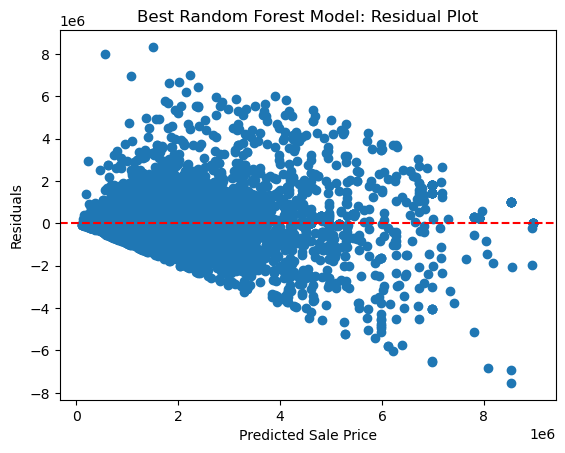

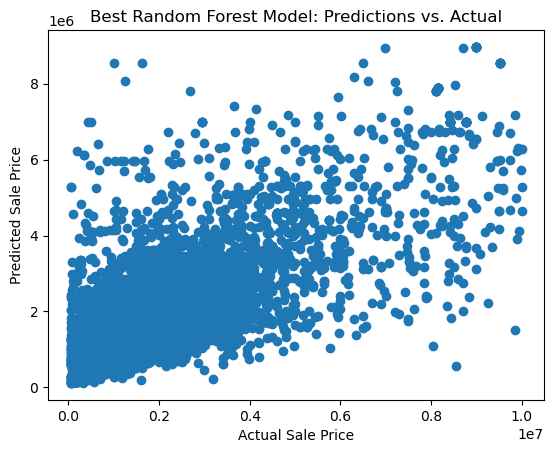

Root Mean Squared Error: 777355.6799536418
Mean Absolute Error: 395206.24089317996
R-squared: 0.6530322669425568


In [207]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the RandomForestRegressor
rf_model = RandomForestRegressor()

# Create the RandomizedSearchCV with n_jobs=-1 (use all available CPU cores)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_rf_model.predict(X_test)

# Calculate metrics for the best model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='Best Random Forest Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


In [208]:
# Perform cross-validation on the best_rf_model to get negative MAE scores
rf_neg_mae = cross_validate(best_rf_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Convert negative MAE scores back to positive MAE scores
mae_scores = -1 * rf_neg_mae['test_score']

# Calculate the mean and standard deviation of the MAE scores
rf_mae_mean = np.mean(mae_scores)
rf_mae_std = np.std(mae_scores)

print("Mean MAE:", rf_mae_mean)
print("MAE Standard Deviation:", rf_mae_std)

'''
This shows that our model has a mean MAE of $409325 and the stdev of the error is quite small at only $8889. 
'''

Mean MAE: 409325.44989205134
MAE Standard Deviation: 8889.518640132756


In [224]:
#Saving the model

import joblib

# Save the best_rf_model to a file
joblib.dump(best_rf_model, 'nyc_housing_price_model.pkl')

# Use this to Load the model from the file
#loaded_model = joblib.load('best_rf_model.pkl')

['nyc_housing_price_model.pkl']